# EDA on Skeleton Data

## Code to Parse Through Nested JSON
#### Code was taken from DS205 class, week 06, notebook 04

In [38]:
#import psycopg2
import os
import json
import csv
from datetime import datetime as dt
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
import numpy as np

In [39]:
 def my_recursive_print_json(j, level = -1):
    "given a json object print it"
    level += 1
    spaces = "    "
    if type(j) is dict:
        dict_2_list = list(j.keys())
        for k in dict_2_list:
            print(spaces * level + k)
            my_recursive_print_json(j[k], level)
            
    elif type(j) is list:
        for (i, l) in enumerate(j):
            print(spaces * level + "[" + str(i) + "]")
            my_recursive_print_json(l, level)
                  
    else:
        print(spaces * level + "value:", str(j))
                

In [40]:
def my_read_nested_json(file_name):
    "given a file of json, read it and parse it meaningfully"
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    my_recursive_print_json(j)

In [41]:
my_read_nested_json("../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json")

[0]
    [0]
        value: person0
    [1]
        [0]
            value: nose
        [1]
            [0]
                value: 417.8628845214844
            [1]
                value: 172.3057403564453
    [2]
        [0]
            value: left_eye
        [1]
            [0]
                value: 428.8619079589844
            [1]
                value: 164.3126220703125
    [3]
        [0]
            value: right_eye
        [1]
            [0]
                value: 417.8628845214844
            [1]
                value: 164.3126220703125
    [4]
        [0]
            value: left_ear
        [1]
            [0]
                value: 456.8594665527344
            [1]
                value: 174.30401611328125
    [5]
        [0]
            value: right_ear
        [1]
            [0]
                value: 416.8629455566406
            [1]
                value: 173.3048858642578
    [6]
        [0]
            value: left_shoulder
        [1]
            [0]
               

In [42]:
f = open('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json', "r")
j = json.load(f)
f.close
j

[['person0',
  ['nose', [417.8628845214844, 172.3057403564453]],
  ['left_eye', [428.8619079589844, 164.3126220703125]],
  ['right_eye', [417.8628845214844, 164.3126220703125]],
  ['left_ear', [456.8594665527344, 174.30401611328125]],
  ['right_ear', [416.8629455566406, 173.3048858642578]],
  ['left_shoulder', [494.85614013671875, 238.2489471435547]],
  ['right_shoulder', [405.8639221191406, 231.25497436523438]],
  ['left_elbow', [556.8507080078125, 290.2041931152344]],
  ['right_elbow', [359.8679504394531, 270.2214050292969]],
  ['left_wrist', [484.85699462890625, 317.18096923828125]],
  ['right_wrist', [433.8614807128906, 305.1912841796875]],
  ['left_hip', [483.8570861816406, 348.154296875]],
  ['right_hip', [423.8623352050781, 356.14739990234375]],
  ['left_knee', [521.853759765625, 431.0828857421875]],
  ['right_knee', [369.8670654296875, 452.0647888183594]],
  ['left_ankle', [514.8543701171875, 546.9830322265625]],
  ['right_ankle', [426.8620910644531, 539.9890747070312]]],
 ['pe

### Functions to Parse JSON and Plot Results

In [43]:
def get_body_position_info(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    people= []

    for i,person in enumerate(j):
        #Set up list to collect person's body location
        person_i = []
        count = 0

        #add each body part position to the list
        for body_part in person:
            count+=1
            if count == 1: continue
            else: person_i.append(body_part[1])

        #Append entire list to list of people
        people.append(person_i)

    return people

def get_body_part_labels(file_name):
    '''Input a JSON file and get the body position of each person.  Outer list is
    list of people.  Inner list is x,y position of each body part for that person'''
    f = open(file_name, "r")
    j = json.load(f)
    f.close
    body_part_labels= []
   
    for i,body_part in enumerate(j[0]):
            if i == 0: continue
            else: body_part_labels.append(body_part[0])

    return body_part_labels


body_part_labels = get_body_part_labels('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
people = get_body_position_info('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0002.json')
people[0]

[[417.4290771484375, 171.84947204589844],
 [429.3904113769531, 162.8577117919922],
 [417.4290771484375, 162.8577117919922],
 [457.3002014160156, 176.84487915039062],
 [416.4322814941406, 173.84762573242188],
 [494.1809997558594, 236.78988647460938],
 [404.470947265625, 233.79263305664062],
 [561.9619140625, 295.7358093261719],
 [358.619140625, 271.7578125],
 [480.2261047363281, 319.71380615234375],
 [432.3807373046875, 304.7275695800781],
 [483.2164306640625, 354.6817321777344],
 [425.4032897949219, 353.6826477050781],
 [520.0972290039062, 433.6093444824219],
 [368.5869140625, 451.59283447265625],
 [494.1809997558594, 578.4764404296875],
 [426.4000549316406, 537.5140380859375]]

In [44]:
body_part_labels

['nose',
 'left_eye',
 'right_eye',
 'left_ear',
 'right_ear',
 'left_shoulder',
 'right_shoulder',
 'left_elbow',
 'right_elbow',
 'left_wrist',
 'right_wrist',
 'left_hip',
 'right_hip',
 'left_knee',
 'right_knee',
 'left_ankle',
 'right_ankle']

In [45]:
#Create body part index dictionary for easy acces to index of each body part
body_part_indx_dict = {}
indexes = list(range(len(body_part_labels)))
for i in range(len(body_part_labels)):
    body_part_indx_dict[body_part_labels[i]] = indexes[i]

body_part_indx_dict

{'nose': 0,
 'left_eye': 1,
 'right_eye': 2,
 'left_ear': 3,
 'right_ear': 4,
 'left_shoulder': 5,
 'right_shoulder': 6,
 'left_elbow': 7,
 'right_elbow': 8,
 'left_wrist': 9,
 'right_wrist': 10,
 'left_hip': 11,
 'right_hip': 12,
 'left_knee': 13,
 'right_knee': 14,
 'left_ankle': 15,
 'right_ankle': 16}

#### Body parts to connect to make skeleton:
-  left_shoulder --> left_elbow
-  left_elbow --> left_wrist
-  left_hip --> left_knee
-  left_knee --> left_ankle

-  right_shoulder --> right_elbow
-  right_elbow --> right_wrist
-  right_hip --> right_knee
-  right_knee --> right_ankle

- left_ear --> left_eye
- left_eye --> nose
- nose --> right_eye
- right_eye --> right_ear


In [46]:
#Hardcode dictionary of connections:
connections_dict = {}
connections_dict['left_shoulder'] = 'left_elbow'
connections_dict['left_elbow'] = 'left_wrist'
connections_dict['left_hip'] = 'left_knee'
connections_dict['left_knee'] = 'left_ankle'
connections_dict['right_shoulder'] = 'right_elbow'
connections_dict['right_elbow'] = 'right_wrist'
connections_dict['right_hip'] = 'right_knee'
connections_dict['right_knee'] = 'right_ankle'
connections_dict['left_ear'] = 'left_eye'
connections_dict['left_eye'] = 'nose'
connections_dict['nose'] = 'right_eye'
connections_dict['right_eye'] = 'right_ear'


In [47]:
def plot_body_positions2(list_of_people, figsize = (8,4)):
    plt.figure(figsize=figsize)
    for i,person in enumerate(list_of_people):
        x_values = [point[0] for point in person]
        y_values = [point[1] for point in person]
        y_values = [800 - i for i in y_values]
        plt.scatter(x_values, y_values, label=f'Person {i}')
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.title('Scatter plot of body positions in X-Y space')
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.show()

In [48]:
def plot_body_positions(list_of_people, figsize = (8,4)):
    plt.figure(figsize=figsize)
    cmap = plt.colormaps.get_cmap('tab10').colors*2 #*2 for when there's >10 ppl/image
    #cmap = cmap + cmap # Get the tab10 colormap
    for i,person in enumerate(list_of_people):
        #separate x and y information into lists
        x_values = [point[0] for point in person]
        y_values = [point[1] for point in person]
        y_values = [800 - i for i in y_values] #Invert x due to skeleton data structure

        #Plot the connections between joints
        for k,v in connections_dict.items():
            temp_x = [x_values[body_part_indx_dict[k]], x_values[body_part_indx_dict[v]]]
            temp_y = [y_values[body_part_indx_dict[k]], y_values[body_part_indx_dict[v]]]
            plt.plot(temp_x, temp_y, linewidth = 4, color = cmap[i])

        #Plot the scatter data and label figure
        plt.scatter(x_values, y_values, label=f'Person {i}', color = cmap[i])
        plt.xlabel('X position')
        plt.ylabel('Y position')
        plt.title('Scatter plot of body positions in X-Y space')
    plt.legend(loc = 'upper left', fontsize = 'small')
    plt.show()

## Basic Exploration of Dance Types

### Ballet

In [49]:
people[0]

[[417.4290771484375, 171.84947204589844],
 [429.3904113769531, 162.8577117919922],
 [417.4290771484375, 162.8577117919922],
 [457.3002014160156, 176.84487915039062],
 [416.4322814941406, 173.84762573242188],
 [494.1809997558594, 236.78988647460938],
 [404.470947265625, 233.79263305664062],
 [561.9619140625, 295.7358093261719],
 [358.619140625, 271.7578125],
 [480.2261047363281, 319.71380615234375],
 [432.3807373046875, 304.7275695800781],
 [483.2164306640625, 354.6817321777344],
 [425.4032897949219, 353.6826477050781],
 [520.0972290039062, 433.6093444824219],
 [368.5869140625, 451.59283447265625],
 [494.1809997558594, 578.4764404296875],
 [426.4000549316406, 537.5140380859375]]

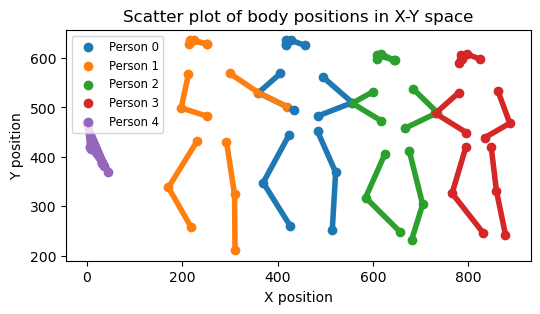

In [50]:
people = get_body_position_info('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0001.json')
plot_body_positions(people, figsize=(6,3))

### Break Dancing

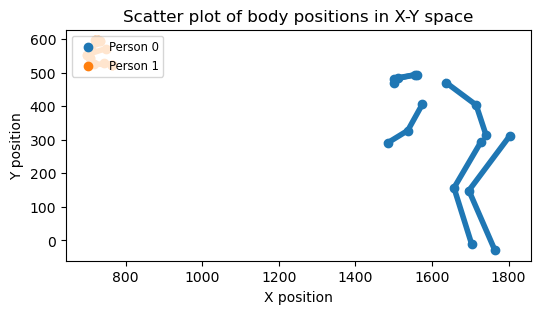

In [51]:
people = get_body_position_info('../Data/densepose/txt/break/_eqF-TA8TVQ_043_0001.json')
plot_body_positions(people, figsize=(6,3))

### Latin

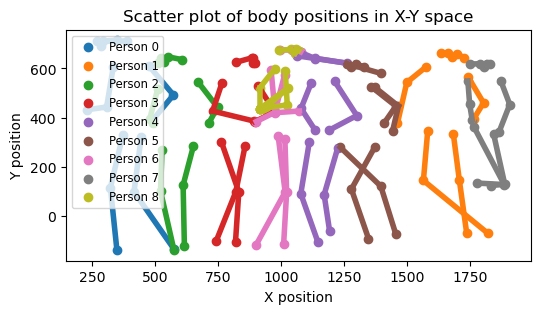

In [52]:
people = get_body_position_info('../Data/densepose/txt/latin/_530Y1Him7s_232_0001.json')
plot_body_positions(people, figsize=(6,3))

### Swing

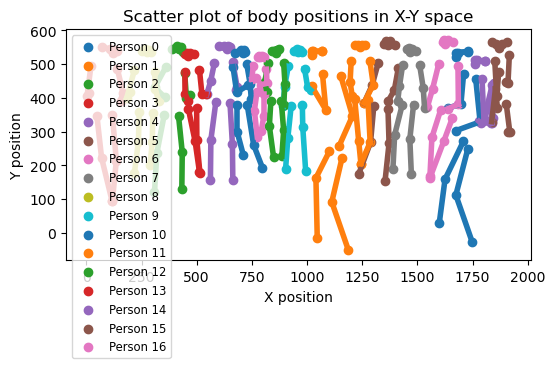

In [53]:
people = get_body_position_info('../Data/densepose/txt/swing/_FidGI7J718_039_0001.json')
plot_body_positions(people, figsize=(6,3))

# Parsing Files & Directories
### Collect Directory Names, File Names, Number of Videos, and First Image Indexes

In [54]:
directory = '../Data/densepose/txt'

#get directories without hidden files
directories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
directories.sort()

#Setup dictionary to collect file names
all_file_names = {}

#Identify all file names
for d in directories:
    #get file names without hidden files
    files = [f for f in os.listdir(os.path.join(directory, d)) if os.path.isfile(os.path.join(directory, d, f))]
    files.sort()
    all_file_names[d] = files

In [55]:
#Count the number of videos in each video type
#Determined by checking last number string on each image and
#checking if it matches '0001'
num_videos = {}
first_img_indexes = {}

for d in directories:
    video_count = 0
    num_images = len(all_file_names[d])
    for i in range(num_images):
        if all_file_names[d][i].split('.')[0].split('_')[-1] == '0001':
            video_count += 1
    num_videos[d] = video_count

In [56]:
#Print out summary results
print(f"{'dance':<9} | {'Num Images':<10} | {'Num Videos':<9}")
print("-"*35)
for k,v in all_file_names.items():
    print(f'{k:<9} | {len(v):<10} | {num_videos[k]}')

dance     | Num Images | Num Videos
-----------------------------------
ballet    | 22410      | 89
break     | 25622      | 95
cha       | 28098      | 98
flamenco  | 24755      | 88
foxtrot   | 23738      | 79
jive      | 29100      | 106
latin     | 24460      | 90
pasodoble | 26607      | 98
quickstep | 24036      | 82
rumba     | 27262      | 94
samba     | 25807      | 96
square    | 27453      | 97
swing     | 26337      | 95
tango     | 24020      | 80
tap       | 28541      | 95
waltz     | 24380      | 80


In [57]:
#Dictionary that contains, for each dance type, the index of the first image
#name of anindividual video file
first_img_indexes = {}

for d in directories:
    num_images = len(all_file_names[d])
    img_count = 0
    first_images = []
    for i in range(num_images):
        if all_file_names[d][i].split('.')[0].split('_')[-1] == '0001':
            first_images.append(img_count)
            #img_count = 0
        img_count += 1
    first_img_indexes[d] = first_images

all_file_names['ballet'][386]

'0aUhNK8tJPU_035_0001.json'

### Test Person Tracking Over Multiple Frames in Video

Filename: -5Yp-vToI2E_016_0001.json


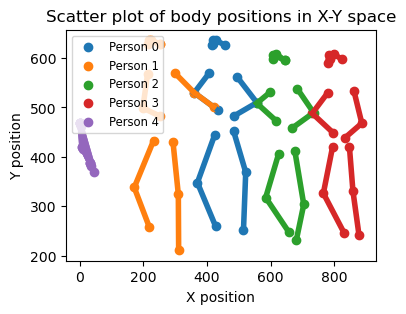

Filename: -5Yp-vToI2E_016_0002.json


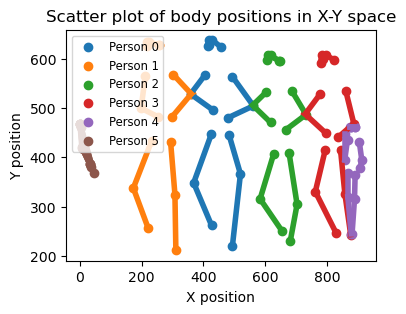

Filename: -5Yp-vToI2E_016_0003.json


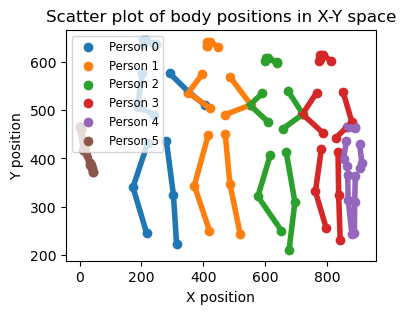

Filename: -5Yp-vToI2E_016_0004.json


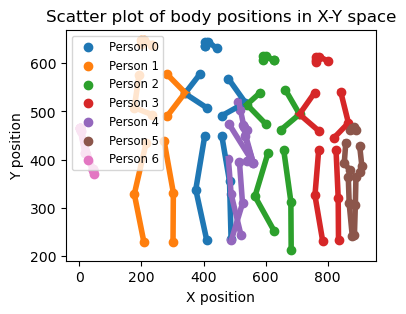

Filename: -5Yp-vToI2E_016_0005.json


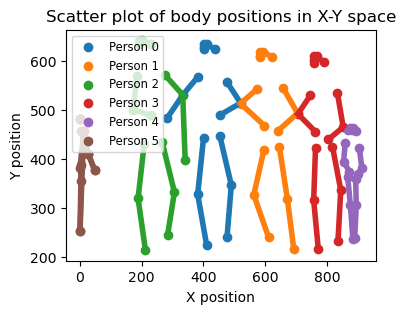

In [58]:
#Explore preliminary data
dance_type = 'ballet'

#Collect files names from specific video
video_num = 0 #Starts counting with 0
start = first_img_indexes[dance_type][video_num]
stop = first_img_indexes[dance_type][video_num + 1]
file_names = all_file_names[dance_type][start:stop]

#Plot the frames
for file in file_names[0:5]:
    print(f'Filename: {file}')
    file_path = os.path.join(directory, dance_type, file)
    people = get_body_position_info(file_path)
    plot_body_positions(people, figsize = (4,3))


### Count the number of people per frame in a given video

In [59]:
def plot_num_ppl_detected(num_ppl_list, figsize = (8,4)):
    '''Plots the number of people detected in each frame over
    the range of a full video'''
    plt.figure(figsize=figsize)
    frame_num = list(range(len(num_ppl_list)))
    plt.plot(frame_num, num_ppl_list)
    plt.xlabel('Frame Number')
    plt.ylabel('Number of People Detected')
    plt.show()

In [60]:
dance_type = 'ballet'

#Collect files names from specific video
video_num = 10 #Starts counting with 0
start = first_img_indexes[dance_type][video_num]
stop = first_img_indexes[dance_type][video_num + 1]
file_names = all_file_names[dance_type][start:stop]

num_ppl_detected = []
for file in file_names:
    file_path = os.path.join(directory, dance_type, file)
    people = get_body_position_info(file_path)
    num_ppl_detected.append(len(people))


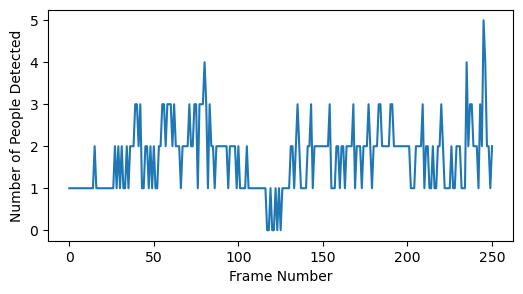

In [61]:
plot_num_ppl_detected(num_ppl_detected, figsize = (6,3))

Note:  This will be an issue.  People come in and out of tracking, so it will be challenging to keep track of who's who if we want to capture temporal information

### Track motion of specific body parts

In [62]:
#Set up indexes to important body parts
nose_index = 0
right_shoulder_index = 6
right_hip_index = 12
right_ankle_index = 16
body_part_labels = ['Nose', 'Right Shoulder', 'Right Hip', 'Right Ankle']
body_part_indexes = [nose_index, right_shoulder_index, right_hip_index, right_ankle_index]

In [63]:
def get_one_body_part_info(file_path, body_part_index):
    '''Pull out the x,y coordinate of the given body part index
    Returns value for a single frame as a list of all people identified
    in the frame'''
    f = open(file_path, "r")
    j = json.load(f)
    f.close
    body_part_location = []
  
    for i,person in enumerate(j):
        body_part_info = person[body_part_index + 1][1]
        body_part_location.append(body_part_info)
    return body_part_location

def get_one_body_part_motion(dance_type, first_img_indexes, all_file_names, directory, video_num = 0, body_part_index = 0):
    '''Collect the location of a specific body part for all people over a full video
    dance type = string of dance type selection
    first_img_indexes = index of all starting points of each video
    all_file_names = compilation of all image names
    directory = directory info
    video num = seletion of video'''
    video_num = video_num 
    start = first_img_indexes[dance_type][video_num]
    stop = first_img_indexes[dance_type][video_num + 1]
    file_names = all_file_names[dance_type][start:stop]

    body_part_over_frames= []
    for file in file_names:
        file_path = os.path.join(directory, dance_type, file)
        body_part_info = get_one_body_part_info(file_path, body_part_index)
        body_part_over_frames.append(body_part_info)
    return body_part_over_frames

def get_one_person_one_body_part(one_body_part_info, person_num = 0):
    '''Takes the list of a body part location for all people over a full
    video and pulls out the info for a single selected person'''
    person_n_body_part_position = []
    for frame in one_body_part_info:
        person_n_body_part_position.append(frame[person_num])
    return person_n_body_part_position
        
def plot_single_body_part(body_part_position, body_part_name, figsize = (6,3)):
    '''Plots the tracked location of a body part for a given person
    over all frames in a video'''
    plt.figure(figsize=figsize)
    x_values = [point[0] for point in body_part_position]
    y_values = [point[1] for point in body_part_position]
    y_values = [800 - i for i in y_values]
    plt.scatter(x_values, y_values)
    plt.xlabel('X position')
    plt.ylabel('Y position')
    plt.xlim(0, 800)  
    plt.ylim(0, 800)  
    plt.title(f'{body_part_name} position over full video')
    plt.show()

def plot_body_part_delta(body_part_position, body_part_name, figsize = (6,3)):
    '''Plots the tracked location of a body part for a given person
    over all frames in a video'''
    plt.figure(figsize=figsize)
    x_values = [point[0] for point in body_part_position]
    y_values = [point[1] for point in body_part_position]
    y_values = [800 - i for i in y_values]
    delta_x = [x_values[i] - x_values[i-1] for i in range(1, len(x_values))]
    delta_y = [y_values[i] - y_values[i-1] for i in range(1, len(y_values))]
    plt.scatter(delta_x, delta_y)
    plt.xlabel('X position')
    plt.ylabel('Y position')
    plt.xlim(-500, 500)  
    plt.ylim(-500, 500)  
    plt.title(f'Change in {body_part_name} position between frames')
    plt.show()


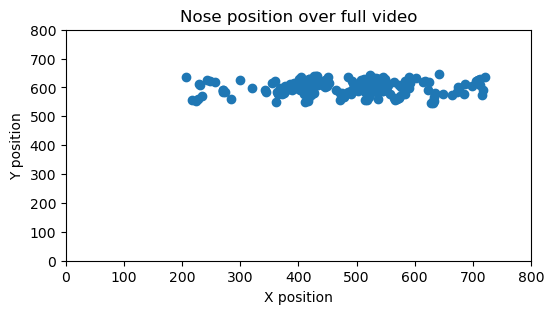

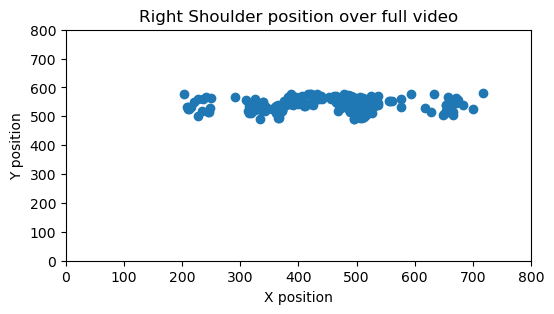

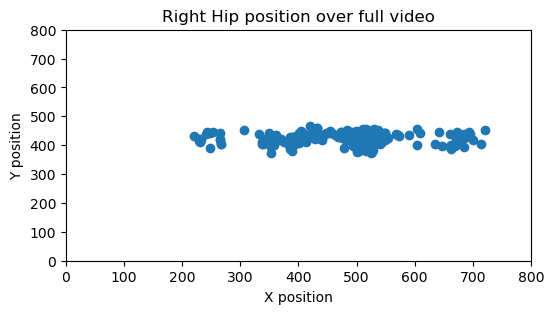

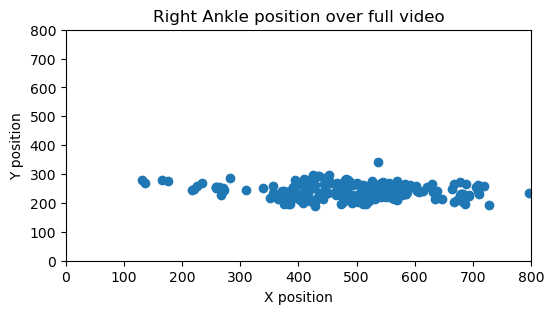

In [64]:
for i,body_part_index in enumerate(body_part_indexes):
    temp_body_part_info = get_one_body_part_motion('ballet', first_img_indexes, all_file_names, 
                                                   directory, video_num = 0, body_part_index = body_part_index)
    person_0_info = get_one_person_one_body_part(temp_body_part_info, person_num = 0)
    plot_single_body_part(person_0_info, body_part_labels[i], figsize = (6,3))

Note: The position of each body part moves drastically across the frame.  Likely because the `person 0` that's captured is changing between frames

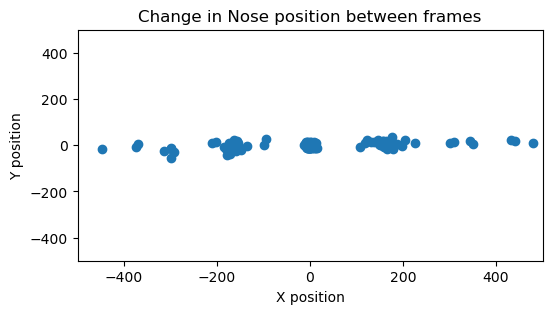

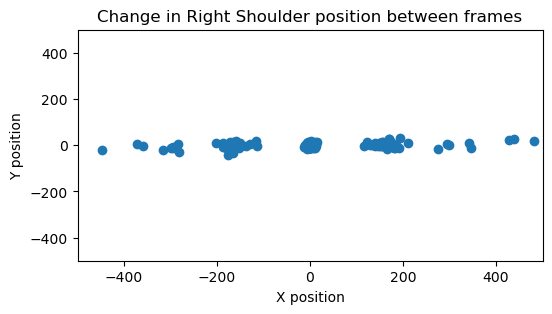

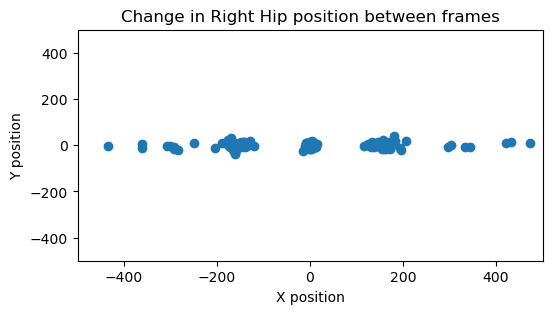

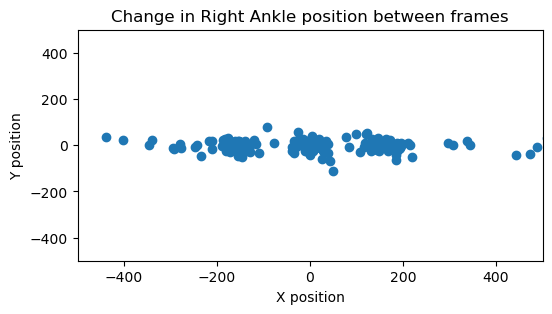

In [65]:
for i,body_part_index in enumerate(body_part_indexes):
    temp_body_part_info = get_one_body_part_motion('ballet', first_img_indexes, all_file_names, 
                                                   directory, video_num = 0, body_part_index = body_part_index)
    person_0_info = get_one_person_one_body_part(temp_body_part_info, person_num = 0)
    plot_body_part_delta(person_0_info, body_part_labels[i], figsize = (6,3))

Note:  Plotting the delta (change in position between frames) confirms the suspicion.  Any body part should not move very much between 2 frames since 1 frame = 1/30 of a second.  

The person tracking software is switching who `person 0` is between each frame.  You can also see the each person's individual cluster of datapoints.

# Testing Function to Swap People

In [66]:
def closest_distance(point1, point2):
    cd = np.linalg.norm(point1 - point2)
    return cd


def find_closest_person(previous_data, current_data):

    ## starting with first person from next file
    for c_person in current_data:
        new_person = ''
        min_distance = float('inf')
        cr_right_hip = None
        cr_left_hip = None

        ## gather coordinates of both right & left hip (current file)
        for part in c_person:
            if part[0] == 'right_hip':
                cr_right_hip = np.array(part[1])
            elif part[0] == 'left_hip':
                cr_left_hip = np.array(part[1])

        ## looping through each person from previous file
        for p_person in previous_data:
            pv_right_hip = None
            pv_left_hip = None

            ## gathering coordinates of both right & left hip (previous file)
            for part in p_person:
                if part[0] == 'right_hip':
                    pv_right_hip = np.array(part[1])
                elif part[0] == 'left_hip':
                    pv_left_hip = np.array(part[1])
            
            if cr_right_hip is not None and cr_left_hip is not None and pv_right_hip is not None and pv_left_hip is not None:
                distance = closest_distance(cr_right_hip, pv_right_hip) + closest_distance(cr_left_hip, pv_left_hip)

            ## finding which person has minimum distance
            if distance < min_distance:
                min_distance = distance
                new_person = p_person[0]

        ## assigning new person to current data
        c_person[0] = new_person

In [77]:
# Load the JSON file
with open('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0003.json', 'r') as f:
    curr_data = json.load(f)

 # Load the JSON file
with open('../Data/densepose/txt/ballet/-5Yp-vToI2E_016_0002.json', 'r') as f:
    prev_data = json.load(f)

In [84]:
## print statement is for print each step in iteration

## starting with first person from next file
for c_person in curr_data:
    new_person = ''
    min_distance = float('inf')
    cr_right_hip = None
    cr_left_hip = None
    print('############################################')
    print('TESTING PERSON: ', c_person[0])
    print('############################################')

    ## gather coordinates of both right & left hip (current file)
    for part in c_person:
        if part[0] == 'right_hip':
            cr_right_hip = np.array(part[1])
        elif part[0] == 'left_hip':
            cr_left_hip = np.array(part[1])

    ## looping through each person from previous file
    for p_person in prev_data:
        pv_right_hip = None
        pv_left_hip = None
        print('COMPARING TESTING PERSON TO: ', p_person[0])

        ## gathering coordinates of both right & left hip (previous file)
        for part in p_person:
            if part[0] == 'right_hip':
                pv_right_hip = np.array(part[1])
            elif part[0] == 'left_hip':
                pv_left_hip = np.array(part[1])
            
        if cr_right_hip is not None and cr_left_hip is not None and pv_right_hip is not None and pv_left_hip is not None:
            distance = closest_distance(cr_right_hip, pv_right_hip) + closest_distance(cr_left_hip, pv_left_hip)

        print('DISTANCE BETWEEN: ', distance)

        ## finding which person has minimum distance
        if distance < min_distance:
            min_distance = distance
            new_person = p_person[0]

        print('CLOSEST PERSON: ', new_person)
        print('-----------------------')

    ## assigning new person to current data
    c_person[0] = new_person

############################################
TESTING PERSON:  person0
############################################
COMPARING TESTING PERSON TO:  person0
DISTANCE BETWEEN:  408.5701748375832
CLOSEST PERSON:  person0
-----------------------
COMPARING TESTING PERSON TO:  person1
DISTANCE BETWEEN:  26.780802889360775
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person2
DISTANCE BETWEEN:  806.3120667687624
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person3
DISTANCE BETWEEN:  1138.745386096233
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person4
DISTANCE BETWEEN:  1265.9864386293166
CLOSEST PERSON:  person1
-----------------------
COMPARING TESTING PERSON TO:  person5
DISTANCE BETWEEN:  504.05154363357474
CLOSEST PERSON:  person1
-----------------------
############################################
TESTING PERSON:  person1
############################################
COMPARING TESTING PERSO

In [91]:
def reorder_people(data):
    ''' Input a list of people where the person number has been updated to the correctly identified person, but the
    order of the people is still out of order.  This function will correctly reorder the list of people for
     proper plotting '''
    updated_people = [0 for i in range(len(data))]
    for person in data:
        person_index = int(person[0][-1]) #Pulls out the digit number of the person
        updated_people[person_index] = person #Place the person in the correct order
    return updated_people


In [ ]:
def get_ppl_info(data):
    people = []
    j = data

    for i,person in enumerate(j):
        #Set up list to collect person's body location
        person_i = []
        count = 0

        #add each body part position to the list
        for body_part in person:
            count+=1
            if count == 1: continue
            else: person_i.append(body_part[1])

        #Append entire list to list of people
        people.append(person_i)

    return people

In [92]:
updated_data = reorder_people(curr_data)
data1 = get_ppl_info(updated_data)
data2 = get_ppl_info(prev_data)


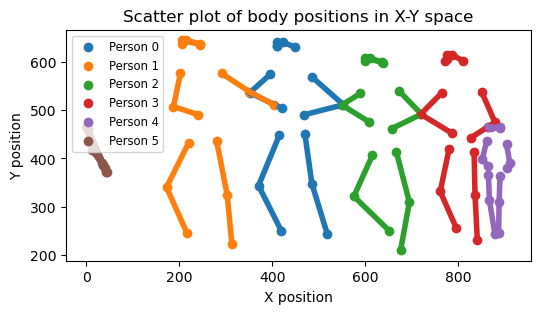

In [93]:
plot_body_positions(data1, figsize=(6,3))

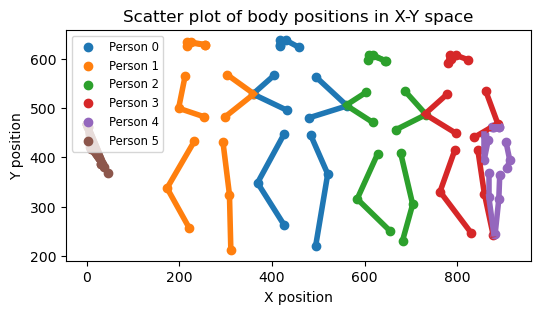

In [94]:
plot_body_positions(data2, figsize=(6,3))
